<a href="https://colab.research.google.com/github/victor-bastos/DataScienceIntroduction/blob/main/LAB1/Lab1_CMC_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab 1 CMC-13

# Table of Content

* [Preparação dos dados](#prep)
  * [Importação de pacotes e carregamento dos dados](#imp)
  * [Primeira análise](#ana)
    * [Excluindo features não desejadas](#exc)
    * [Engenharia dos dados de localização](#eng)
  * [Preenchendo valores nulos](#nulo)
* [Análise exploratória](#anexp)
  * [Lidando com outliers](#out)
  * [Categorical encoding](#cat)
  * [Discretização de variáveis](#disc)
  *[Escala de variáveis](#scal)
  *[Transformação de variáveis](#transf)
* [Aplicando o modelo KNN](#KNN)
  * [Grid search](#grid)
  * [Testes 'manuais' e visualização](#manu)
* [Aplicando o modelo Decision Tree Classifier](#DTC)
  * [Grid search](#grid2)
  * [Testes 'manuais' e visualização](#manu2)
* [Classificador a priori ](#priori)


<a name='prep'></a>
# 1 - Preparação dos dados



Primeiramente, devemos avaliar se as features são úteis para o nosso modelo

<a name='imp'></a>
## Importando pacotes e dados

In [ ]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats
plt.style.use('ggplot')
#importing train_test_split
from sklearn.model_selection import train_test_split
#Ordinal encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
#Discretizer
from sklearn.preprocessing import KBinsDiscretizer
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#import Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
#import metrics (accuracy score, confusion matrix, f1 score, classification report, area under ROC curve)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Transform
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
#Conectando no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dados lidos do drive, diretamente, por conveniência

In [ ]:
# loading data
path_files = '/content/drive/MyDrive/Colab Notebooks/Lab1_CMC-13/'

url_test_data = 'https://drive.google.com/file/d/1-VA48hABLfx6NoifmmviQ0EcVgFJl9xS/view?usp=sharing'
url_test_data = 'https://drive.google.com/uc?id=' + url_test_data.split('/')[-2]

url_train_data = 'https://drive.google.com/file/d/11_UEIUAApPgQ3DmiUiiFcICwHjzWoPwc/view?usp=sharing'
url_train_data = 'https://drive.google.com/uc?id=' + url_train_data.split('/')[-2]


df_train = pd.read_csv(url_train_data, on_bad_lines='skip',sep = ';')
df_test = pd.read_csv(url_test_data,on_bad_lines='skip',sep = ';')

#gabarito_treino = df_train['rating']
#gabarito_teste = df_test['rating']
#df_train.drop(columns = ['rating'], inplace = True)
#df_test.drop(columns = ['rating'], inplace = True)


<a name='ana'></a>
## Primeira análise

Primeiramente, vamos ver a "cara" do dataset

In [ ]:
df_train

,Unnamed: 0.1,Unnamed: 0,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_l,Language,Category,city,state,country
0,98,98,9,34.7439,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],germantown,tennessee,usa
1,99,99,243,34.7439,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],arden hills,minnesota,usa
2,100,100,388,35.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],nashville,tennessee,usa
3,103,103,3363,29.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],knoxville,tennessee,usa
4,105,105,6795,31.0000,0440234743,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],portland,oregon,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131174,511368,511368,247055,25.0000,067169507X,0,SEAT OF THE SOUL,Gary Zukav,1990.0,Free Press,http://images.amazon.com/images/P/067169507X.0...,en,"['Body, Mind & Spirit']",daly city,california,usa
131175,511369,511369,253696,62.0000,067169507X,10,SEAT OF THE SOUL,Gary Zukav,1990.0,Free Press,http://images.amazon.com/images/P/067169507X.0...,en,"['Body, Mind & Spirit']",waldport,oregon,usa
131176,511370,511370,254971,53.0000,067169507X,8,SEAT OF THE SOUL,Gary Zukav,1990.0,Free Press,http://images.amazon.com/images/P/067169507X.0...,en,"['Body, Mind & Spirit']",boise,idaho,usa
131177,511371,511371,267326,37.0000,067169507X,0,SEAT OF THE SOUL,Gary Zukav,1990.0,Free Press,http://images.amazon.com/images/P/067169507X.0...,en,"['Body, Mind & Spirit']",longwood,florida,usa


Vamos ver também quantos valores diferentes existem em cada coluna

In [ ]:
df_train.nunique()

Unnamed: 0.1           131179
Unnamed: 0             131179
user_id                 31176
age                        85
isbn                     1024
rating                     11
book_title                942
book_author               427
year_of_publication        31
publisher                 151
img_l                    1024
Language                    2
Category                   55
city                     7097
state                     858
country                   187
dtype: int64

*   As colunas ['unnamed'] provavelmente são só ordenadores, como o índice.
*   A coluna ['user_id'] poderia ser utilizada, mas isso deveria assumir alguma lógica para os números utilizados. Assim, também não compensa usá-la
*   ['img_L'] é um link que não traz novas informações que o nome do livro já não traz
*   ['isbn'] é um código que não traz informações que o nome do livro já não traz
*   ['Language'] seria uma boa feature, mas temos somente 'en' e '9'. Como não sabemos o que é o '9', essa feature não será utilizada.







<a name='exc'></a>
### Excluindo features não desejadas

Então, vamos já eliminar essas features indesejadas. Manteremos o user_id para não perder informações importantes

In [ ]:
user_id_train = df_train['user_id']
user_id_test = df_test['user_id']

df_train.drop(columns = ['Unnamed: 0.1','Unnamed: 0','user_id','Language','img_l'],inplace = True)
df_test.drop(columns = ['Unnamed: 0.1','Unnamed: 0','user_id','Language','img_l'],inplace = True)

E, quanto a valores faltantes

In [ ]:
df_train['country'][df_train['country'].isna()]

11        NaN
62        NaN
121       NaN
176       NaN
199       NaN
         ... 
130888    NaN
130894    NaN
131071    NaN
131133    NaN
131146    NaN
Name: country, Length: 4564, dtype: object

In [ ]:
df_train.isna().sum()

age                       0
isbn                      0
rating                    0
book_title                0
book_author               0
year_of_publication       0
publisher                 0
Category                  0
city                    949
state                  2016
country                4564
dtype: int64

<a name='eng'></a>
### Engenharia dos dados de localização

Como é estranho faltar mais valores do país que de cidade, vamos analisar isso mais a fundo

In [ ]:
#Tirando as vírgulas incorretas que existem
df_train['state'] = df_train['state'].str.replace(',','')
df_test['state'] = df_test['state'].str.replace(',','')

#Trocando espaços vazios por NaN
df_train.replace('',np.nan,inplace = True)
df_test.replace('',np.nan,inplace = True)

#Filtrando dados
pais_faltante = df_train[df_train['country'].isna()]
estado_faltante = df_train[df_train['state'].isna()]

Será que existem dados com país faltante que, em outros dados de mesmo estado o país não está faltando? Se existirem, podemos recuperar essas informações sem precisar olhar fora do dataset

Vamos iterar para verificar as duplas em que podemos inferir o país por meio do estado. E, também, o estado por meio da cidade, da mesma forma.

In [ ]:
#Função que identifica as duplas e retorna em dicionário
def retornar_duplas(variavel, preencher, df_slice):
  #df_slice é o dataset em que só tem valores faltantes para a variável a preencher escolhida (por exmp, dataset onde todas as cidades sao nulas)

  #Olhando todos os valores da variável escolhida (por exp, vamos ver todas as cidades que existem no dataset)
  variavel_em_paises_preencher = df_slice[variavel][~df_slice[variavel].isna()].value_counts().index.tolist()
  #Abrindo um dicionário para as duplas
  duplas = {}

  for i in variavel_em_paises_preencher: #Iterando para cada variável diferente que existe no dataset (por exp, iterando em todas as cidades do dataset)
    temp = df_train[df_train[variavel] == i] #dataset somente com essa cidade
    temp = temp[~temp[preencher].isna()] #verificando se existe correspondência
    if temp.shape[0] >0: #Se existir alguma correspondência
        duplas[temp[variavel].values[0]] = temp[preencher].values[0] #Salvando a dupla

  return duplas

In [ ]:
#Vale a pena ver, também, cidade->estado. Vamos fazê-lo antes, visto que tem menos valores faltando para cidades

variavel = 'city'
preencher = 'state'

duplas_cidade_estado = retornar_duplas('city', 'state', estado_faltante)
#Preenchendo o dataframe
df_train.loc[df_train[preencher].isna(),preencher] = df_train.loc[df_train[preencher].isna()][variavel].map(duplas_cidade_estado)
df_test.loc[df_test[preencher].isna(),preencher] = df_test.loc[df_test[preencher].isna()][variavel].map(duplas_cidade_estado)


#Agora, finalmente, fazendo estado -> país
variavel = 'state'
preencher = 'country'

duplas_estado_pais = retornar_duplas('state', 'country', pais_faltante)
#Preenchendo o dataframe
df_train.loc[df_train[preencher].isna(),preencher] = df_train.loc[df_train[preencher].isna()][variavel].map(duplas_estado_pais)
df_test.loc[df_test[preencher].isna(),preencher] = df_test.loc[df_test[preencher].isna()][variavel].map(duplas_estado_pais)

Verificando a diminuição dos valores de NA. 'Ganhamos' mais de 1000 valores de país e quase 1000 de estado somente olhando o dataset

In [ ]:
df_train.isna().sum()

age                       0
isbn                      0
rating                    0
book_title                0
book_author               0
year_of_publication       0
publisher                 0
Category                  0
city                    949
state                  1419
country                1119
dtype: int64

<a name='nulo'></a>
## Preenchendo valores nulos

Vamos preencher com string específica, para evitar overfitting

In [ ]:
columns = ['city','state','country']
for i in columns:
  df_train.loc[df_train[i].isna(),i] = 'Missing_'+ i
  df_test.loc[df_test[i].isna(),i] = 'Missing_'+ i

<a name='anexp'></a>
#2 - Análise exploratória

Vamos investigar as distribuições das features

In [ ]:
# Function to create a histogram, a Q-Q plot and
# a boxplot.

def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

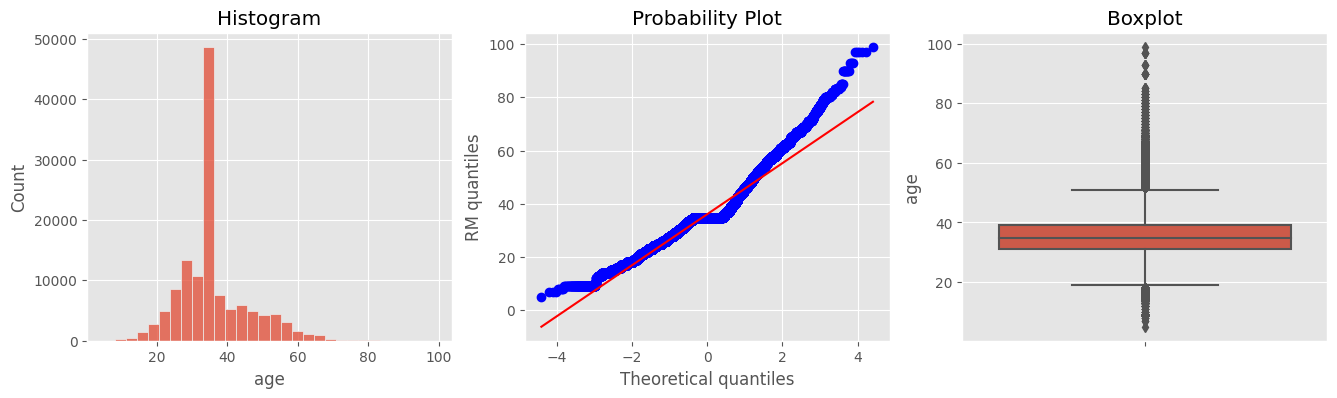

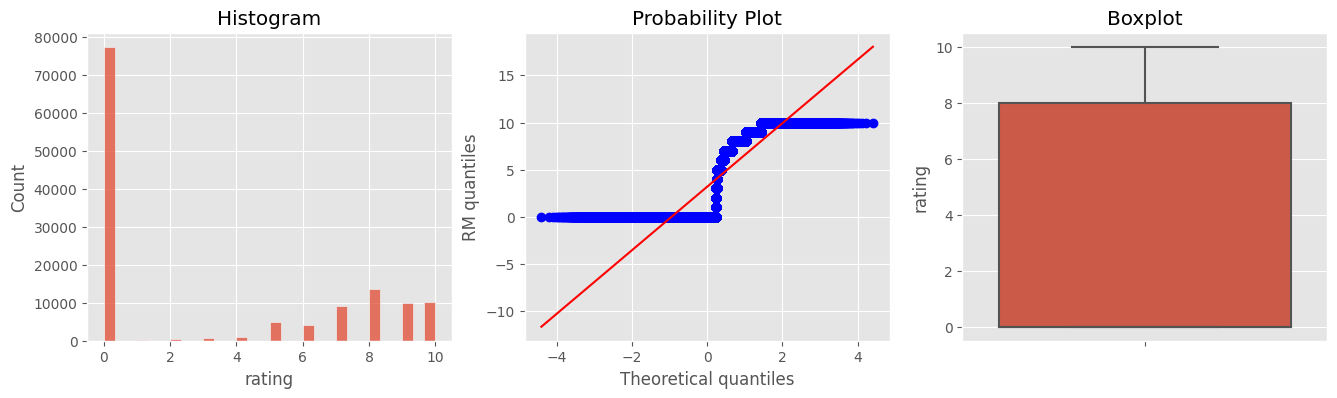

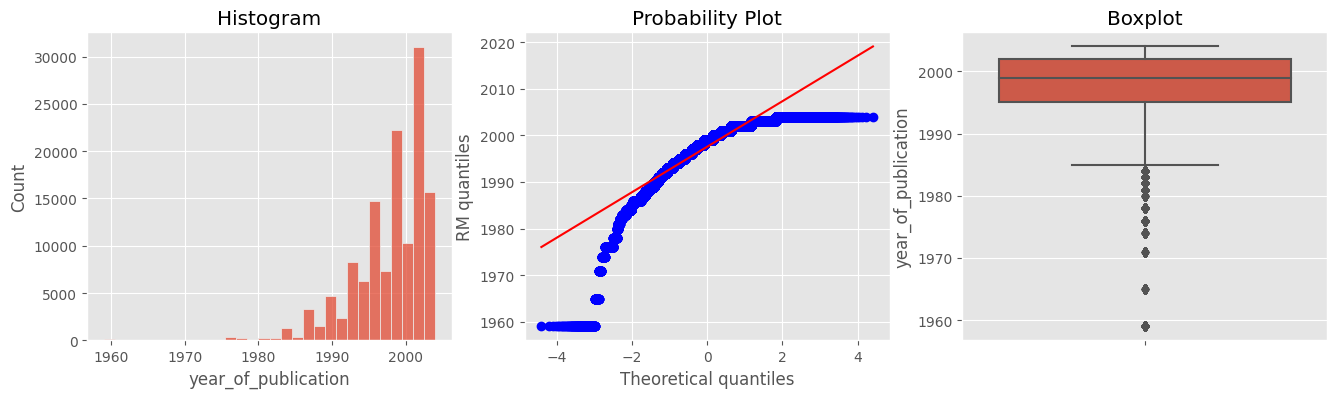

In [ ]:
# categorical
categorical = [var for var in df_train.columns if df_train[var].dtype == 'O' ]
for i in df_train.columns:
  if i not in categorical:
    diagnostic_plots(df_train, i)

<a name='out'></a>
##Lidando com outliers

Utilizemos o método dos quantis, em que definimos até que percentil os dados serão mantidos

In [ ]:
#Função que retorna os limites com base nos quantis escolhidos
def find_limits(df, variable, q1, q2):
    lower_limit = df[variable].quantile(q1/100)
    upper_limit = df[variable].quantile(q2/100)
    return lower_limit, upper_limit


As únicas features que pareceram precisar desse tratamento

In [ ]:
#Cortando esses outliers
for i in ['age','year_of_publication']:
  lower_limit, upper_limit = find_limits(df_train, i,2,98)
  df_train[i].clip(lower=lower_limit, upper=upper_limit, inplace=True)
  df_test[i].clip(lower=lower_limit, upper=upper_limit, inplace=True)


gabarito_treino = df_train['rating']
gabarito_teste = df_test['rating']
df_train.drop(columns = ['rating'], inplace = True)
df_test.drop(columns = ['rating'], inplace = True)

<a name='cat'></a>
##Categorical encoding

Como todas as features categóricas possuem muitos valores diferentes, vamos utilizar o 'ordinal encoding'.

In [ ]:
# categorical
categorical = [var for var in df_train.columns if df_train[var].dtype == 'O' ]

# let's set up the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# let's set up the column transformer
ct = ColumnTransformer(
    [("oe", encoder, categorical)],
    remainder="passthrough",
)

ct.set_output(transform="pandas")

ct.fit(df_train)


#Transformando os datasets
df_train = ct.transform(df_train)
df_test = ct.transform(df_test)


Vamos verificar as distribuições após o encoding

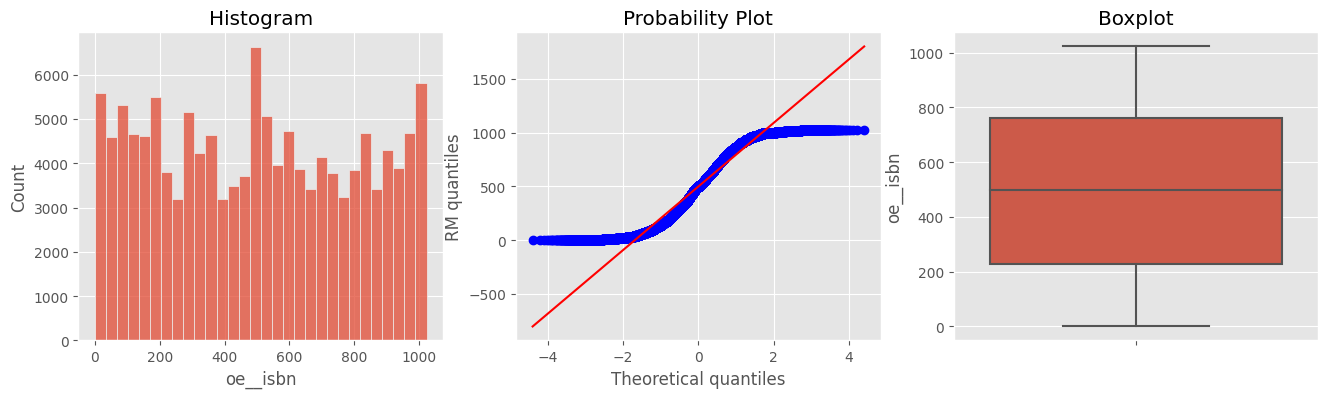

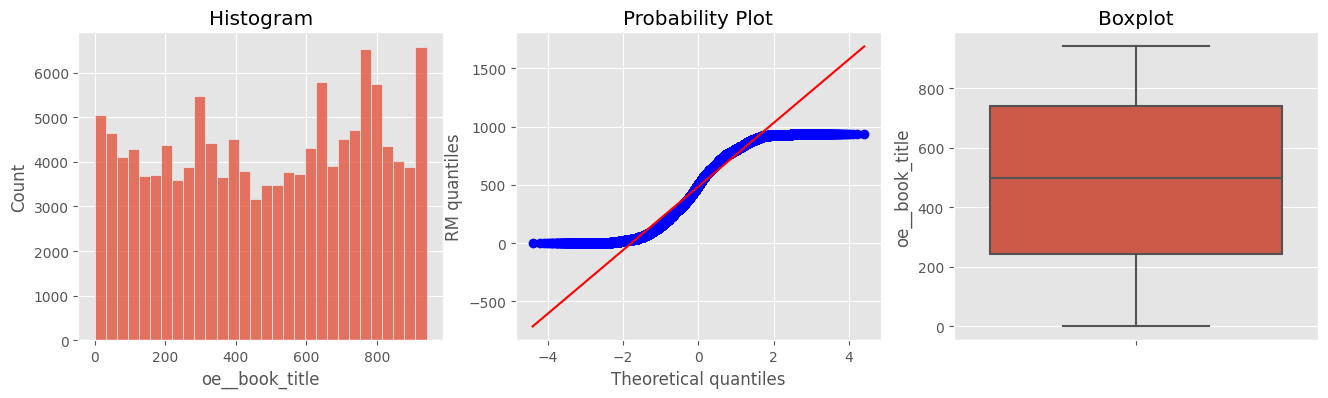

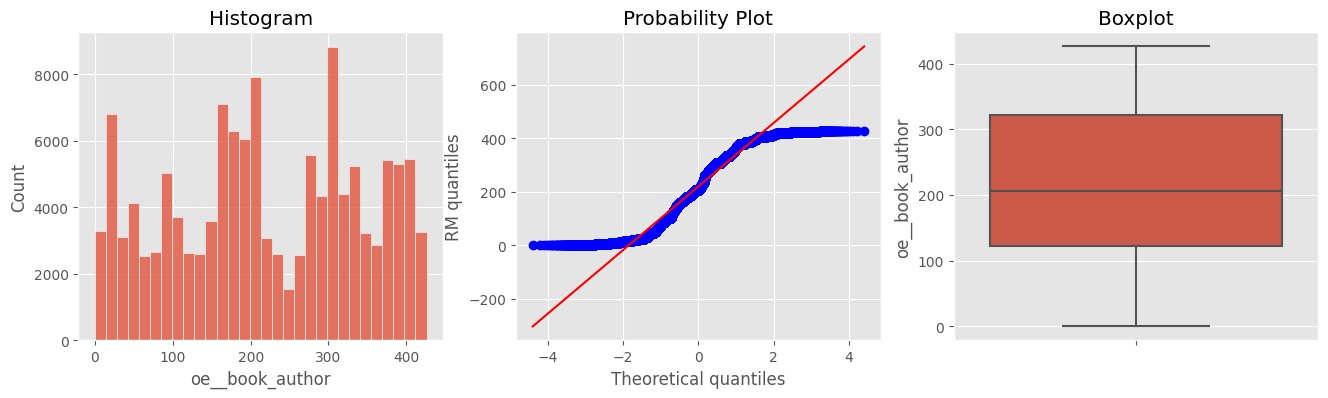

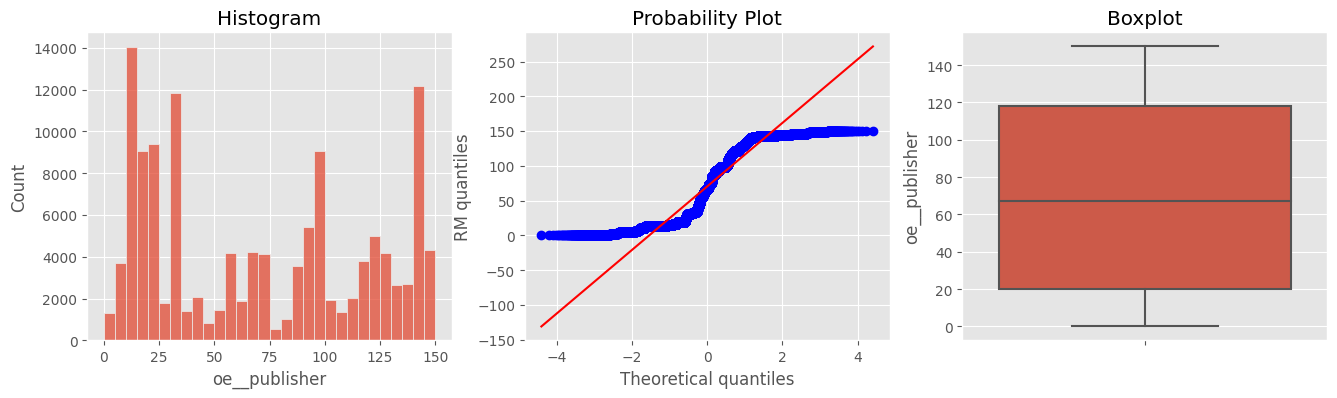

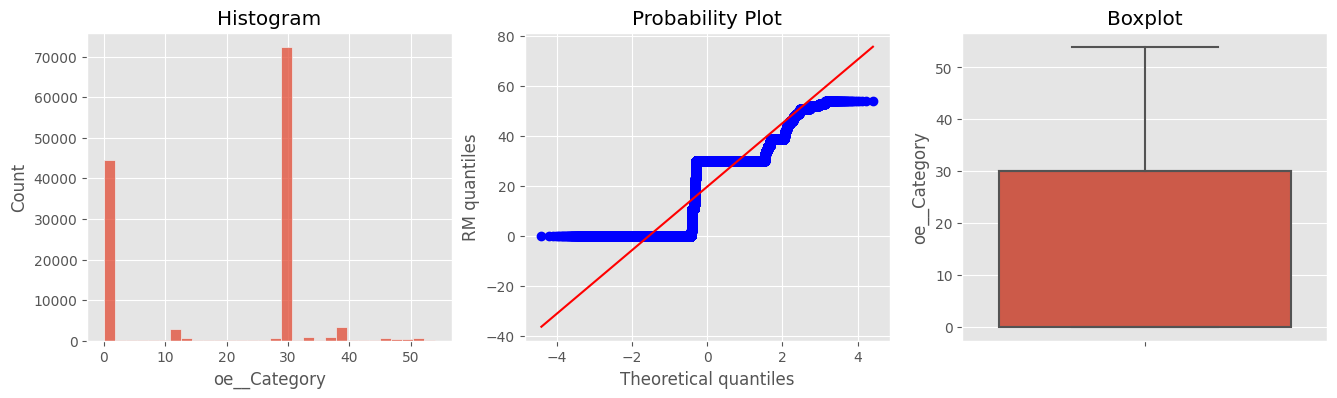

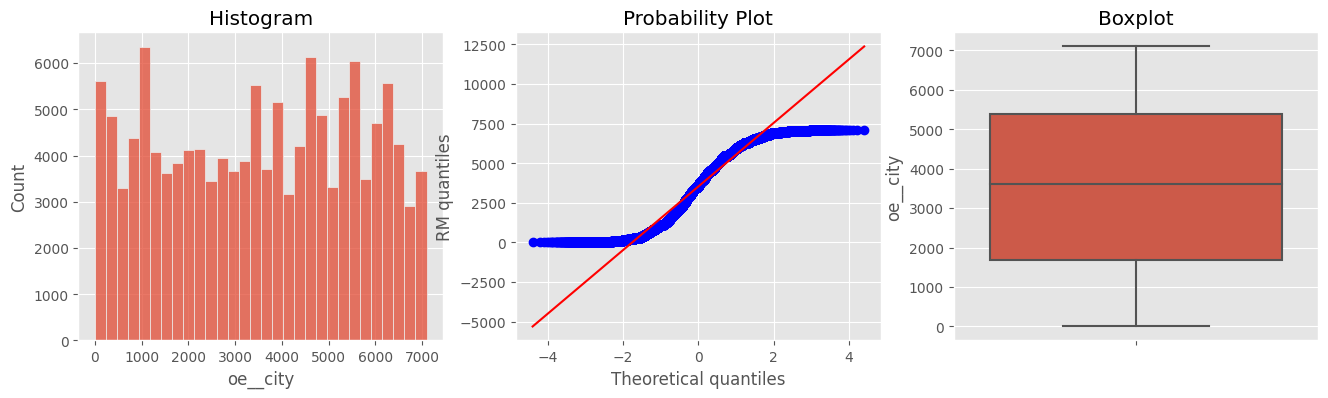

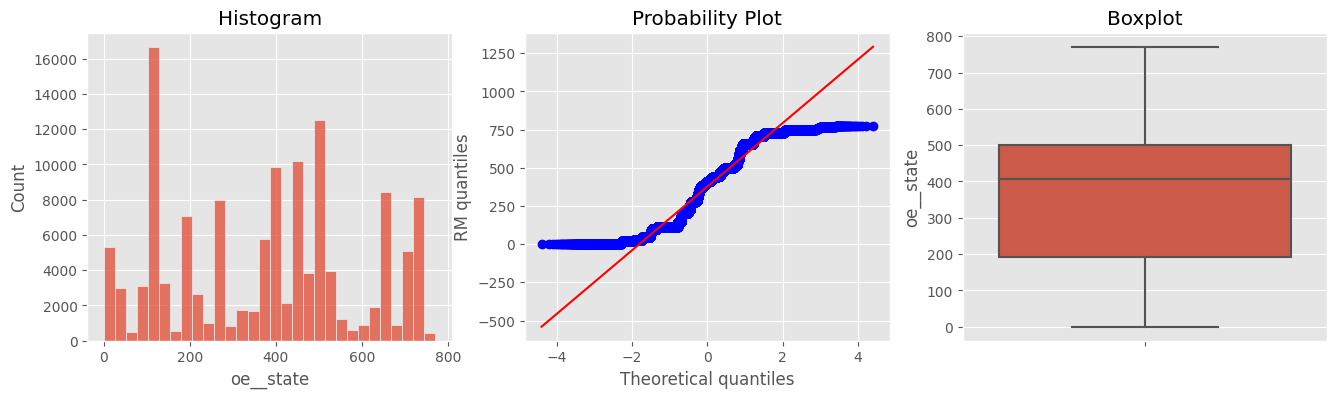

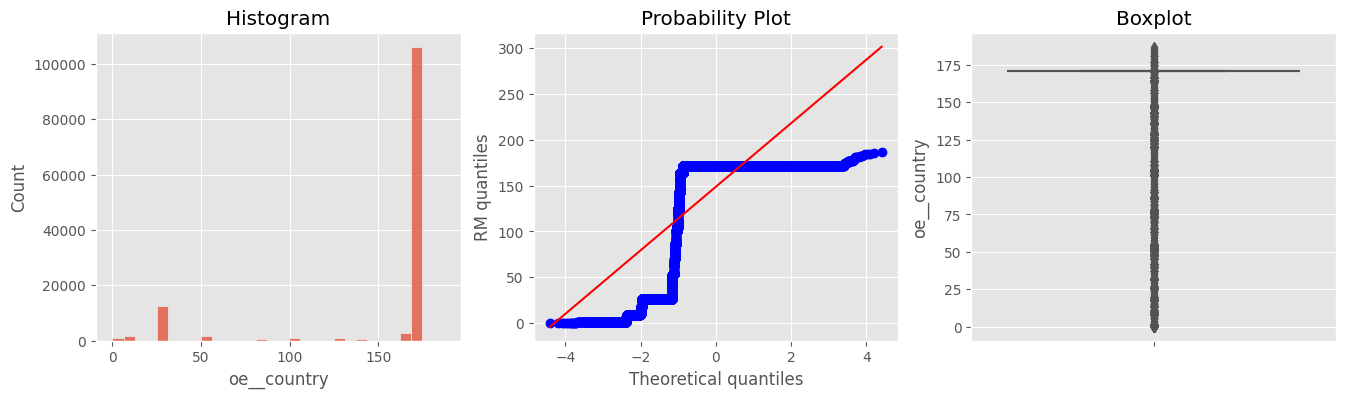

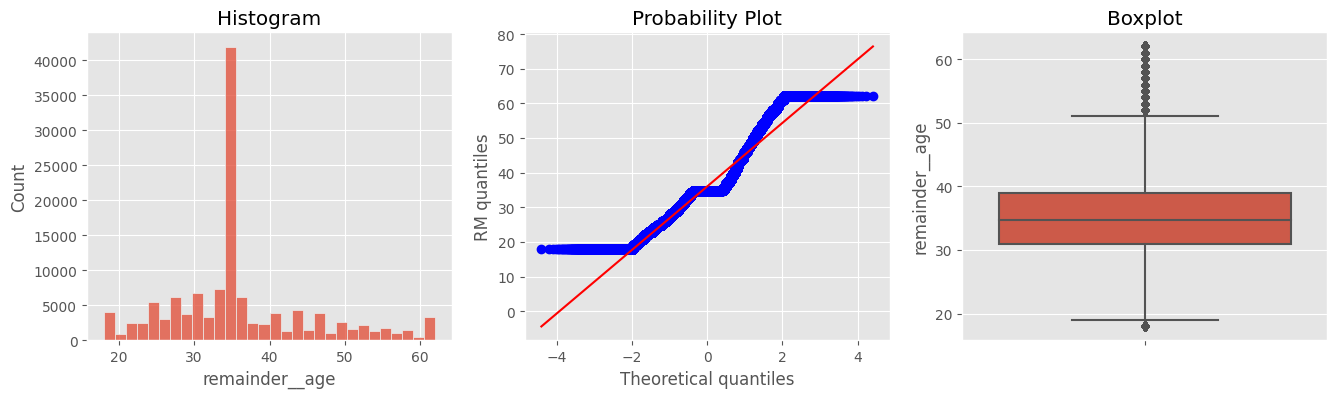

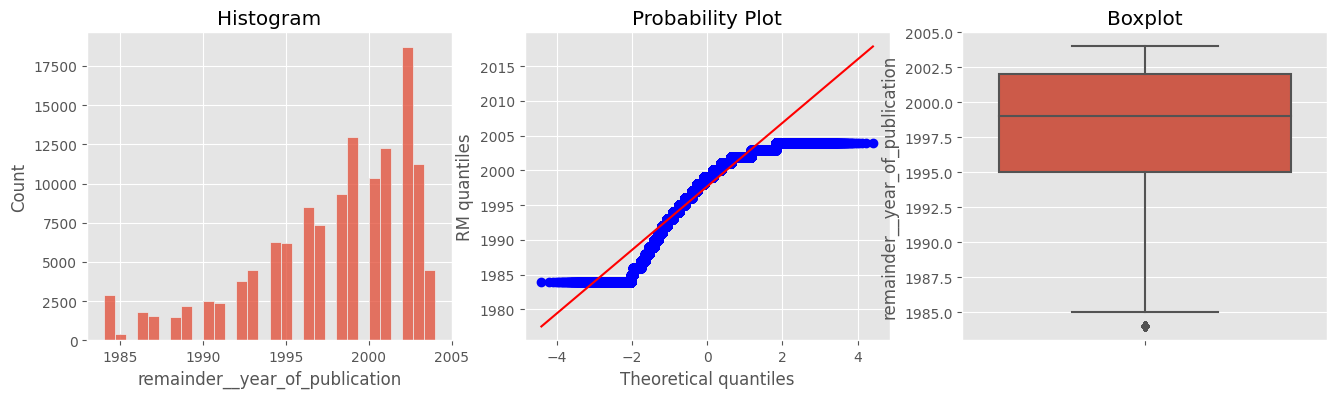

In [ ]:
for i in df_train.columns:
  if i not in categorical:
    diagnostic_plots(df_train, i)

Todas as variáveis podem ser melhoradas por meio de transformações

Variáveis que serão utilizadas no modelo a priori

In [ ]:
train_data_priori = pd.concat([df_train['oe__isbn'], gabarito_treino], axis=1)
test_data_priori = pd.concat([df_test['oe__isbn'], gabarito_teste], axis=1)

Descartando a coluna de "isbn" para as etapas posteriores

In [ ]:
df_train.drop(columns = ['oe__isbn'],inplace = True)
df_test.drop(columns = ['oe__isbn'],inplace = True)

<a name='scal'></a>
## Escalas nas variáveis

Visto que esse problema não possui uma complexidade grande na escolha dos algoritmos, visando o KNN, utilizaremos o min-max-scailing.

In [ ]:
scaler = MinMaxScaler().set_output(transform="pandas")

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df_train)

# transform train and test sets
df_train = scaler.transform(df_train)
df_test= scaler.transform(df_test)

<a name='transf'></a>
## Transformações de variáveis

Vamos utilizar a Yeo-Johnson, visto que ela é a que funciona melhor para o nosso exemplo

In [ ]:
# initialize a transformer with yeo-johnson
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transformer.set_output(transform="pandas")
# fit transformer: transformer will learn the lambdas
transformer.fit(df_train)

X_tf = transformer.transform(df_train)
y_tf = transformer.transform(df_test)


<a name='disc'></a>
##Discretização de variáveis

Temos duas variáveis em que a discretização funciona bem, age e year

In [ ]:
#Equal width discretization
disc = KBinsDiscretizer(
    n_bins=10,
    encode='ordinal',
    strategy='uniform',
)

disc.set_output(transform="pandas")

columns = ['remainder__age', 'remainder__year_of_publication']

disc.fit(df_train[columns])

df_train[columns] = disc.transform(df_train[columns])
df_test[columns] = disc.transform(df_test[columns])


disc.fit(X_tf[columns])
X_tf[columns] = disc.transform(X_tf[columns])
y_tf[columns] = disc.transform(y_tf[columns])

Antes de transformar


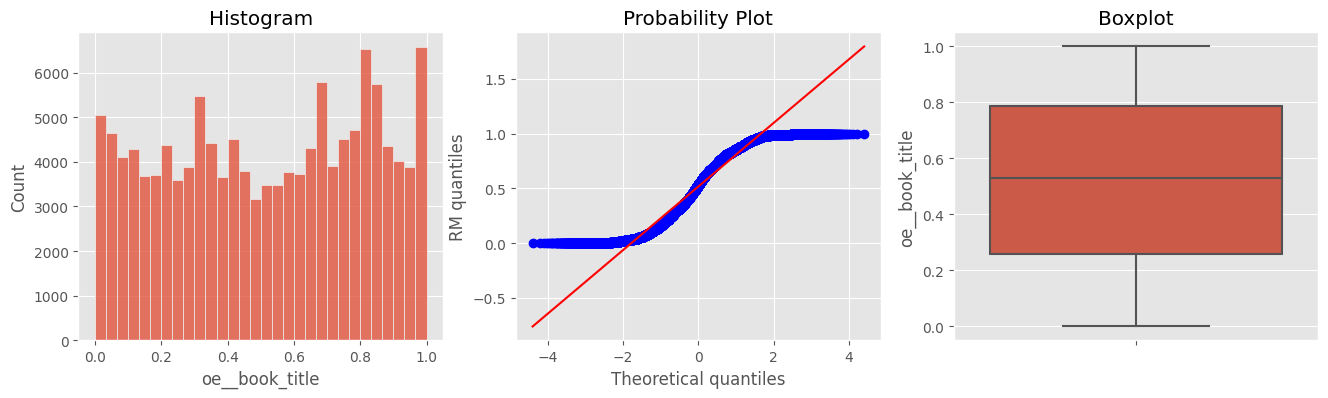

Depois de transformar


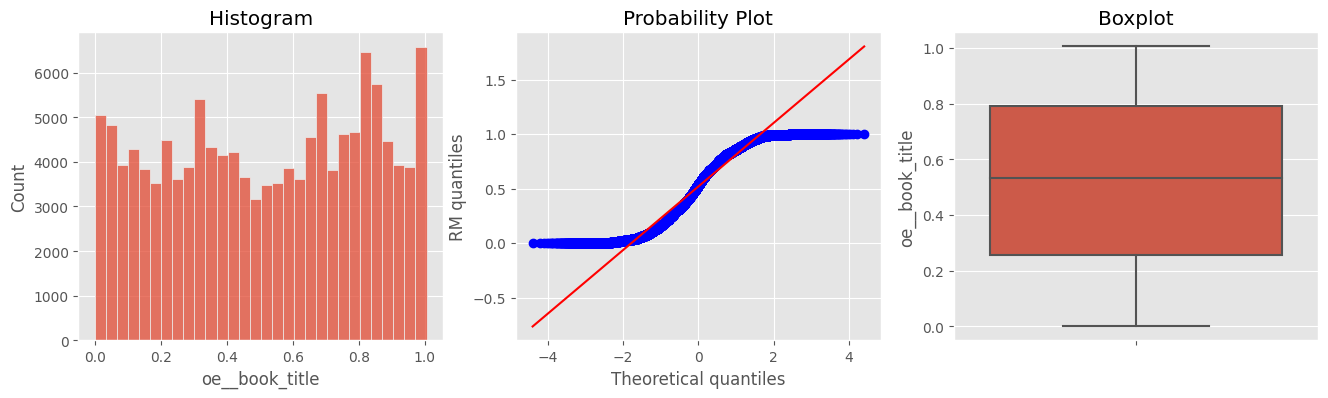

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


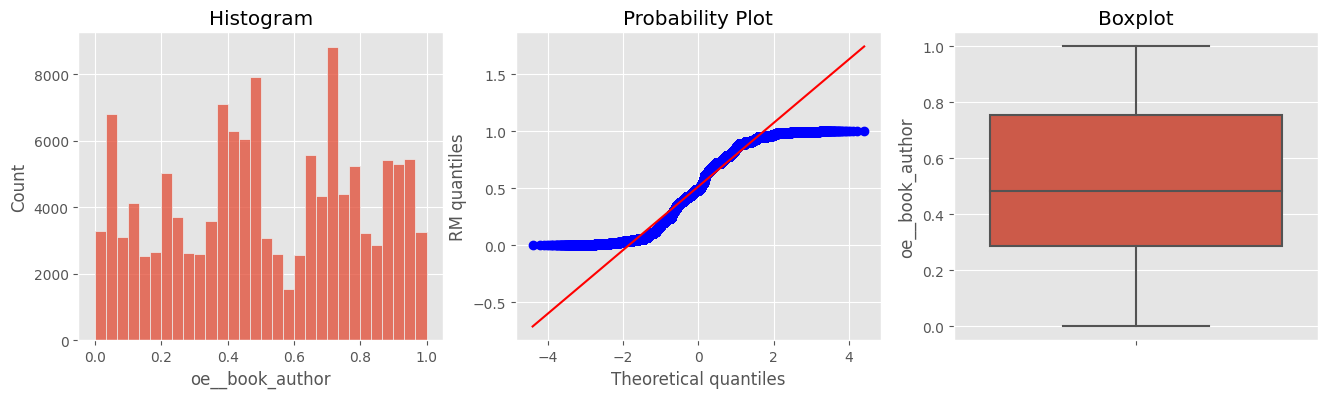

Depois de transformar


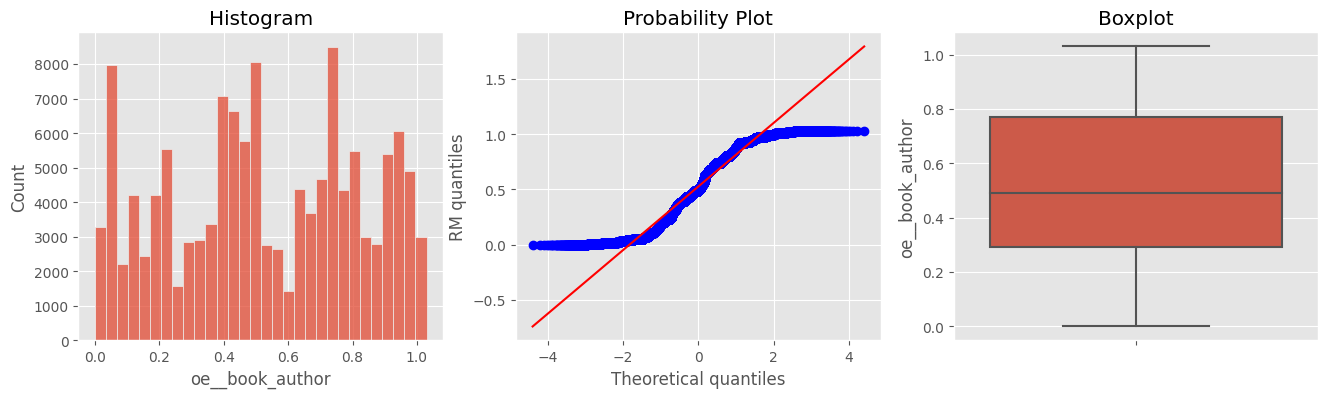

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


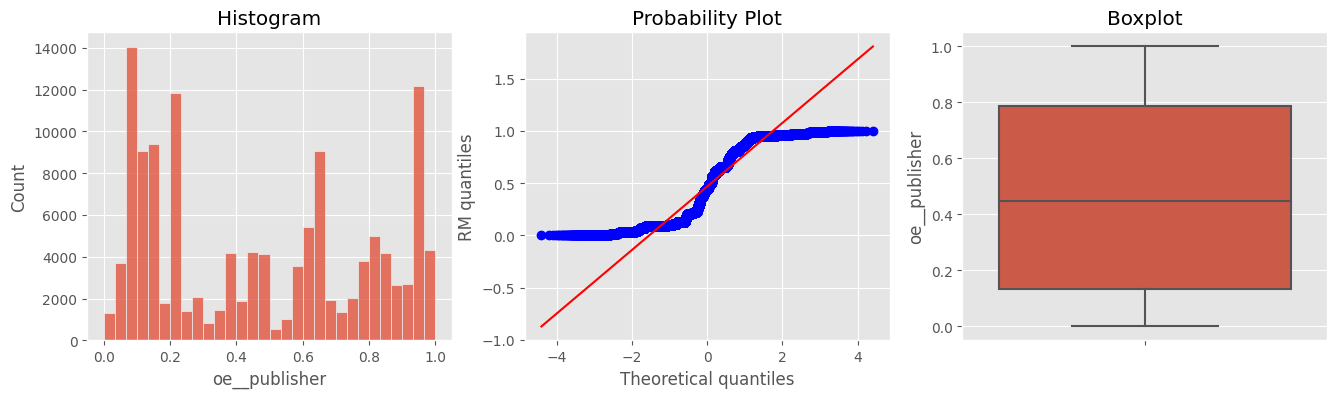

Depois de transformar


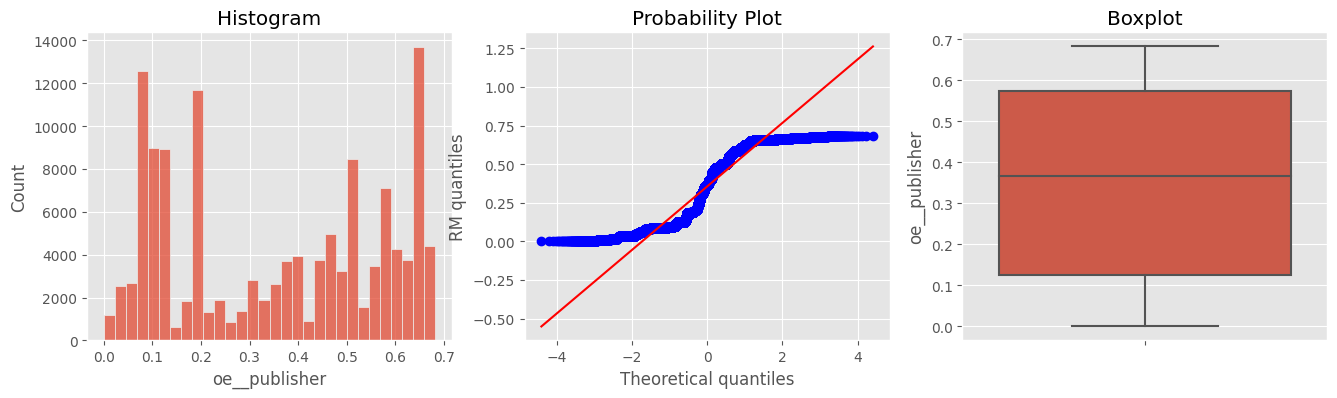

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


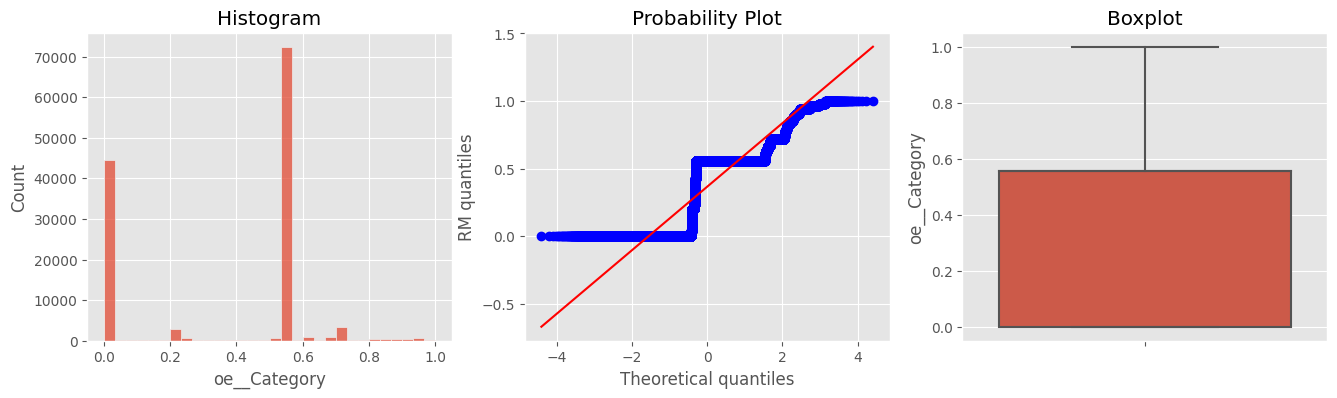

Depois de transformar


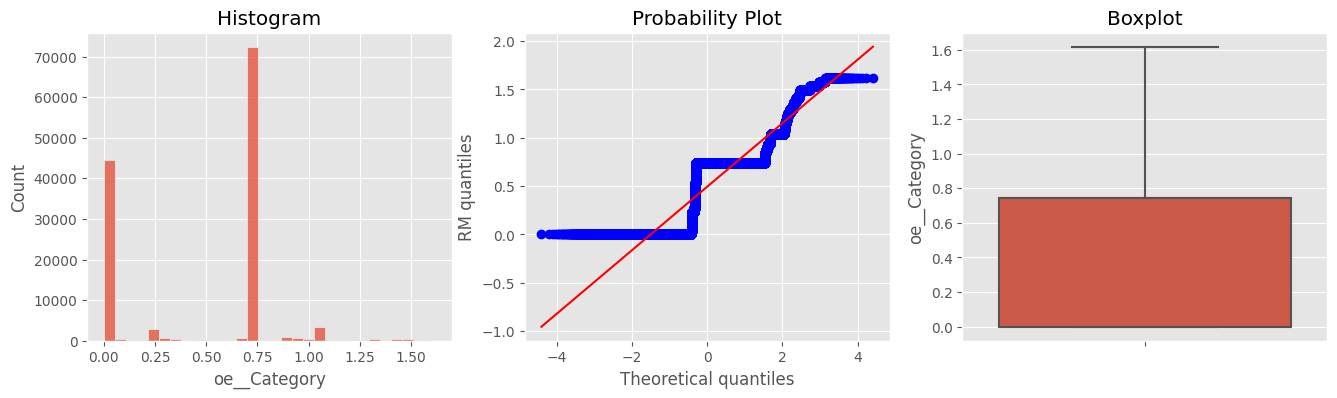

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


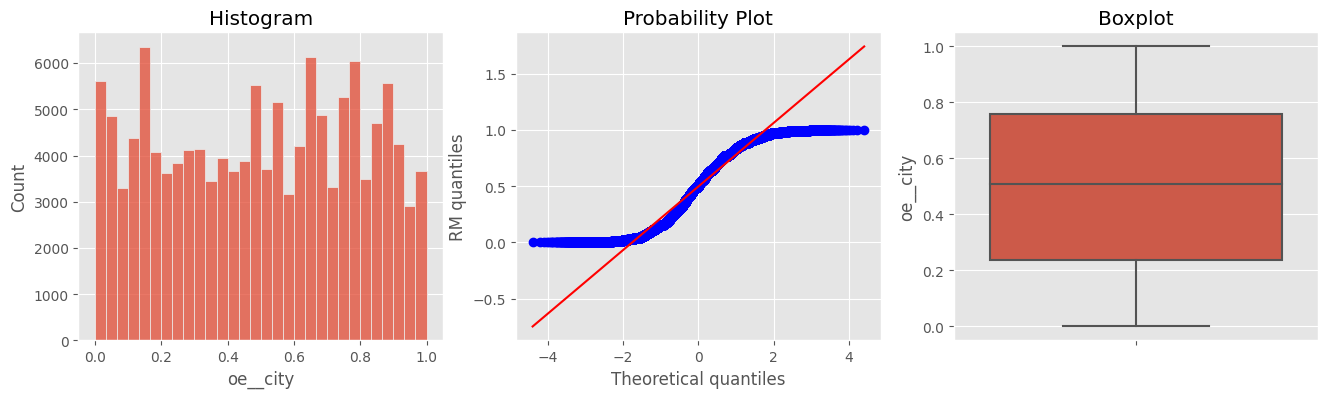

Depois de transformar


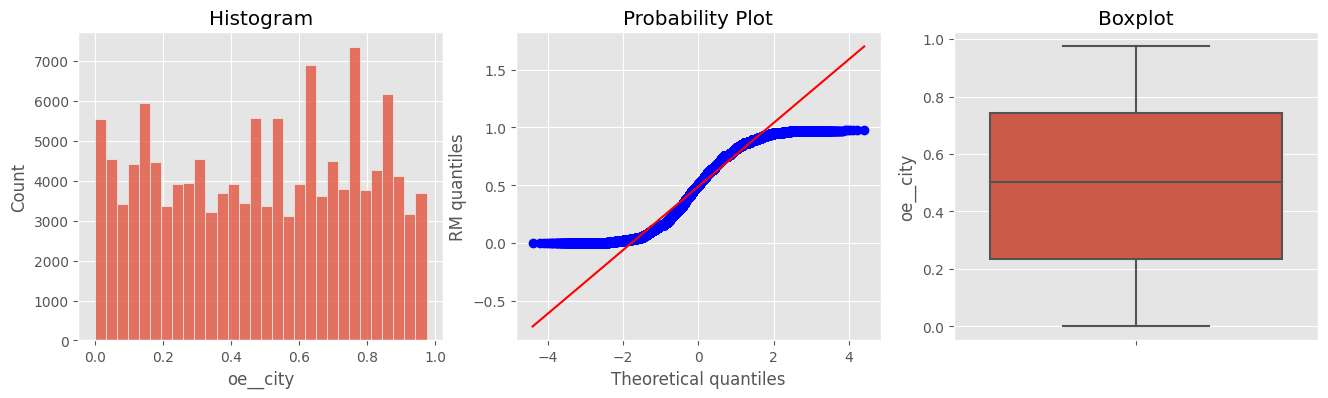

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


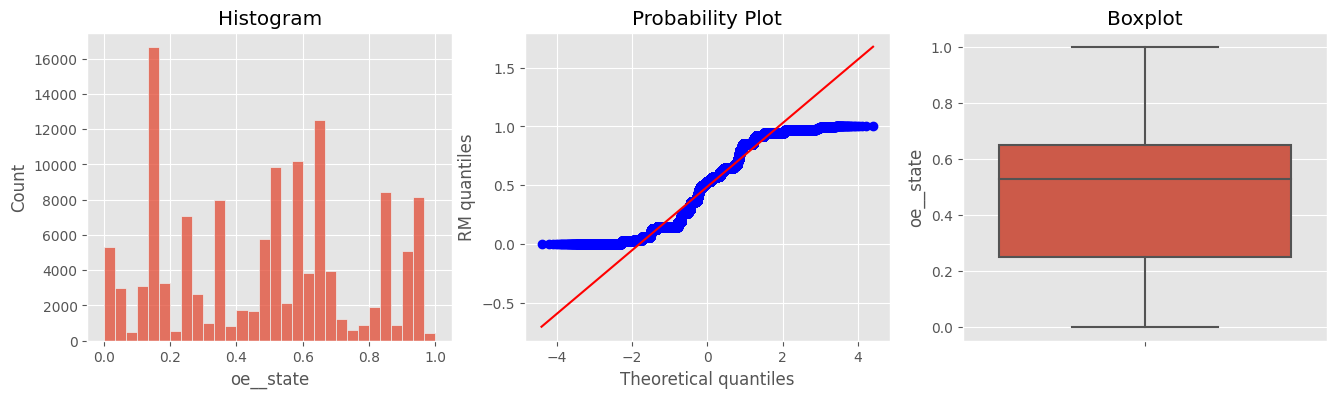

Depois de transformar


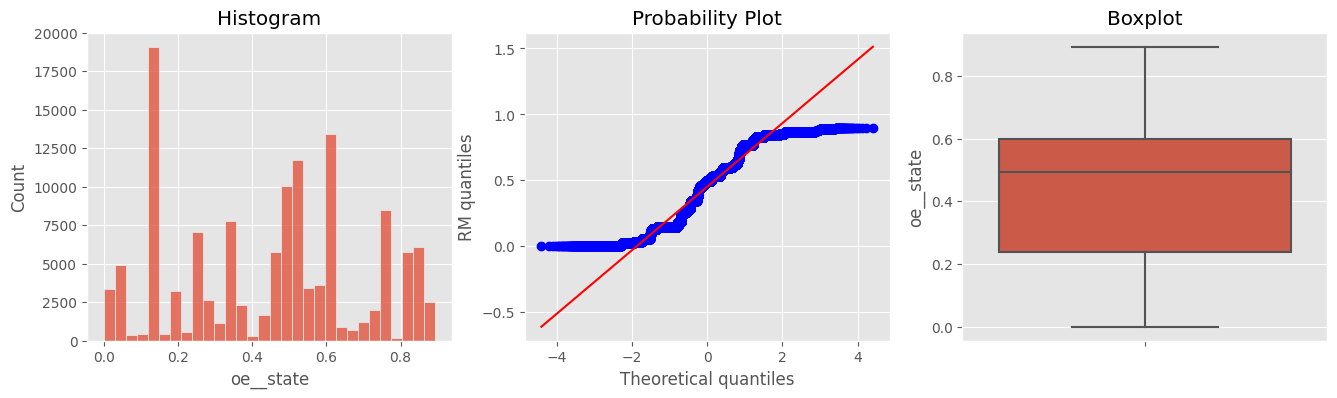

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


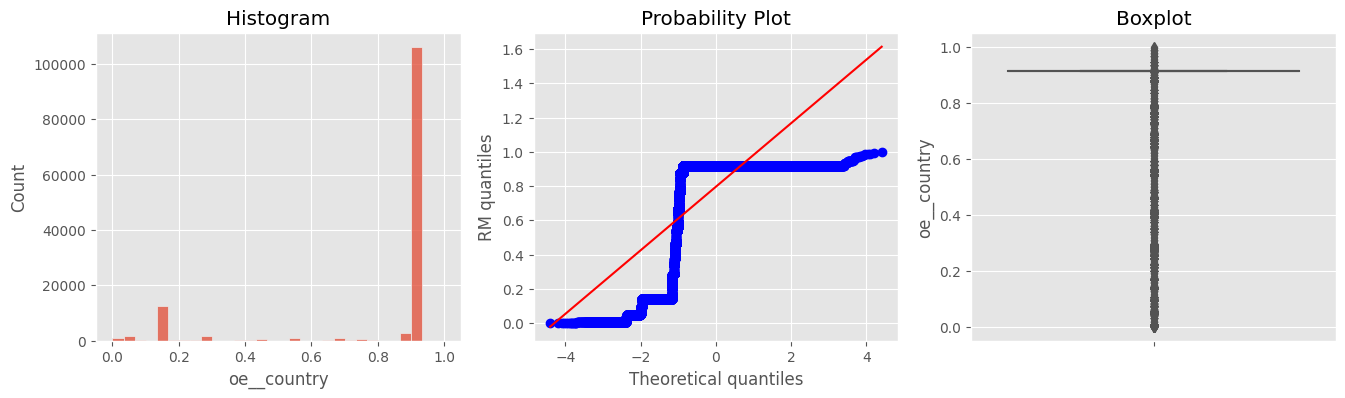

Depois de transformar


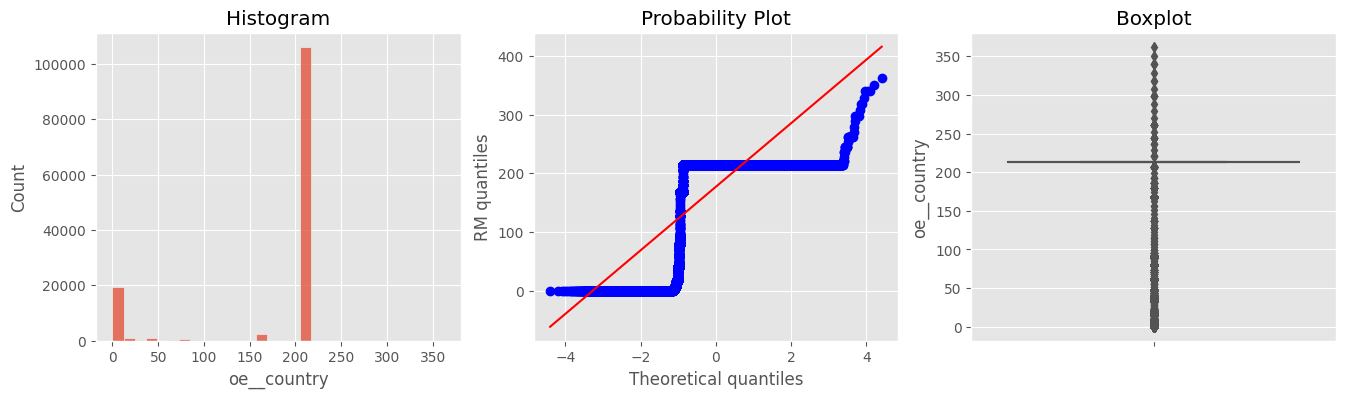

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


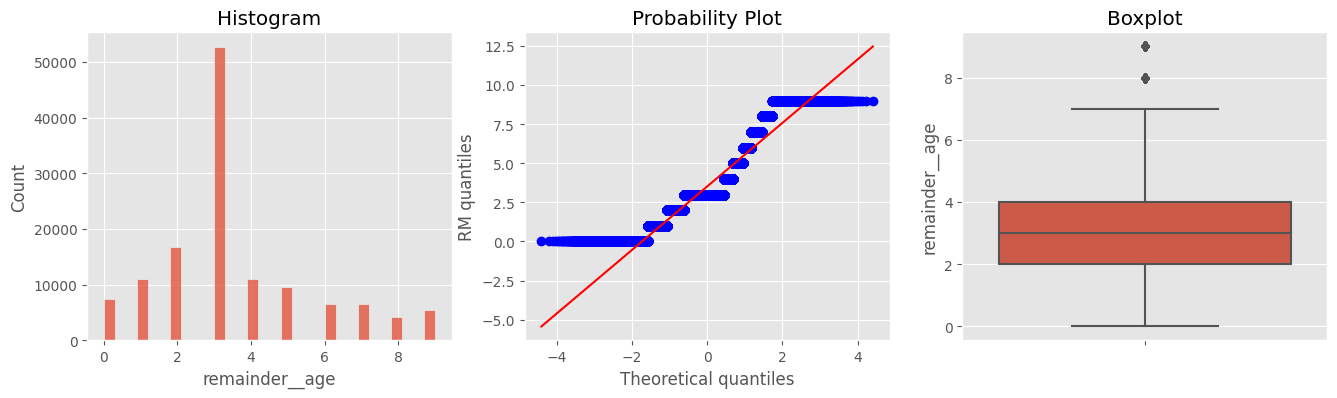

Depois de transformar


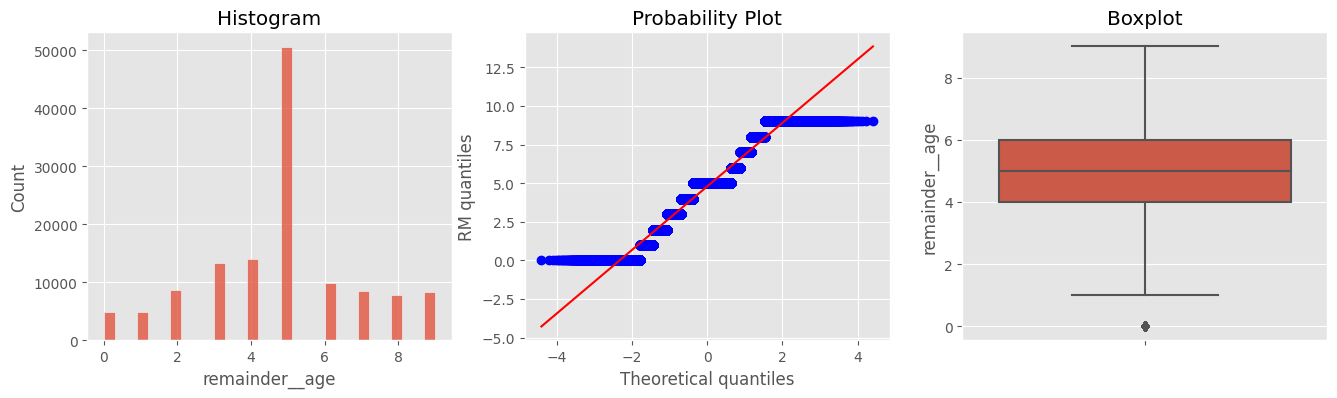

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Antes de transformar


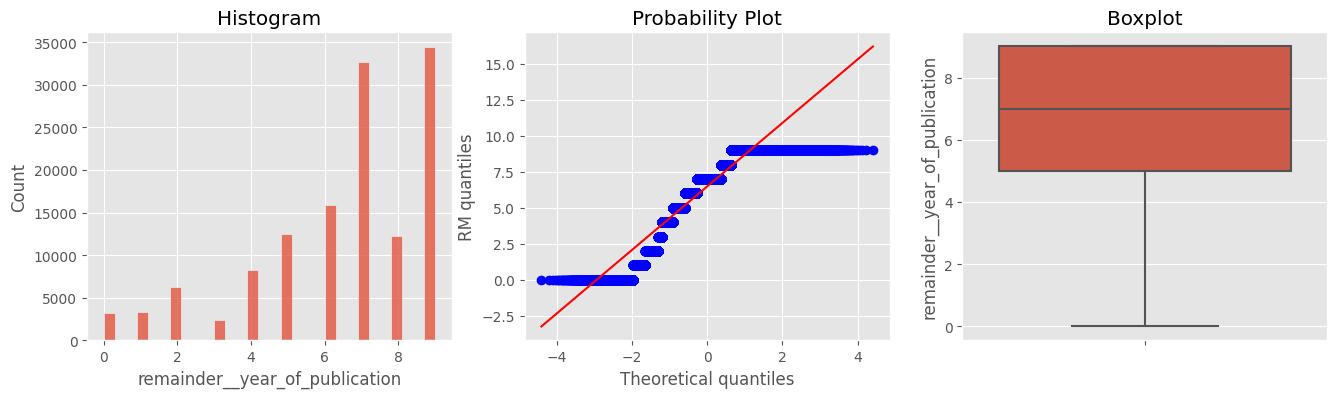

Depois de transformar


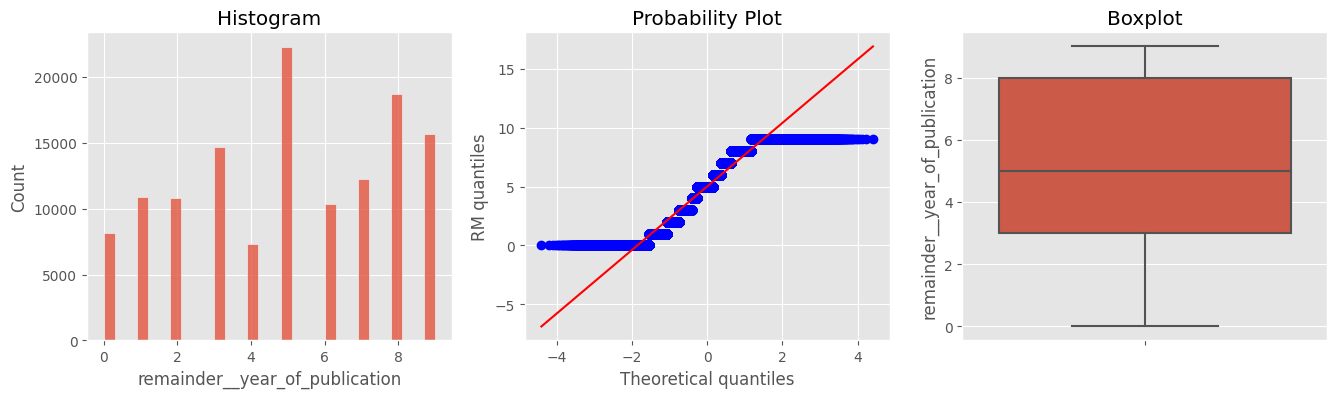

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for i in df_train.columns:
  print('Antes de transformar')
  diagnostic_plots(df_train, i)
  print('Depois de transformar')
  diagnostic_plots(X_tf, i)
  print('----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

<a name='KNN'></a>
#3 - Aplicando o modelo KNN

<a name='grid'></a>
##Grid Search

Utilizando o grid search para procurar os melhores parâmetros

In [ ]:
knn = KNeighborsClassifier()
#k_range = list(range(4, 31))
#param_grid = {'n_neighbors':k_range, 'weights': ['uniform','distance']}

# defining parameter range
#grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
#grid_search=grid.fit(X_tf, gabarito_treino)

n=30 traz o melhor resultado

In [ ]:
#print(grid_search.best_params_)
#grid_search.best_score_

<a name='manu'></a>
##Testes 'manuais' e visualização

Fazendo os testes 'manualmente'

In [ ]:
test_scores = []
train_scores = []

for i in range(15,31):

    knn = KNeighborsClassifier(i)
    knn.fit(X_tf,gabarito_treino)

    train_scores.append(knn.score(X_tf,gabarito_treino))
    test_scores.append(knn.score(y_tf,gabarito_teste))

Podemos plotar os resultados

Text(0.5, 0, 'Número de vizinhos')

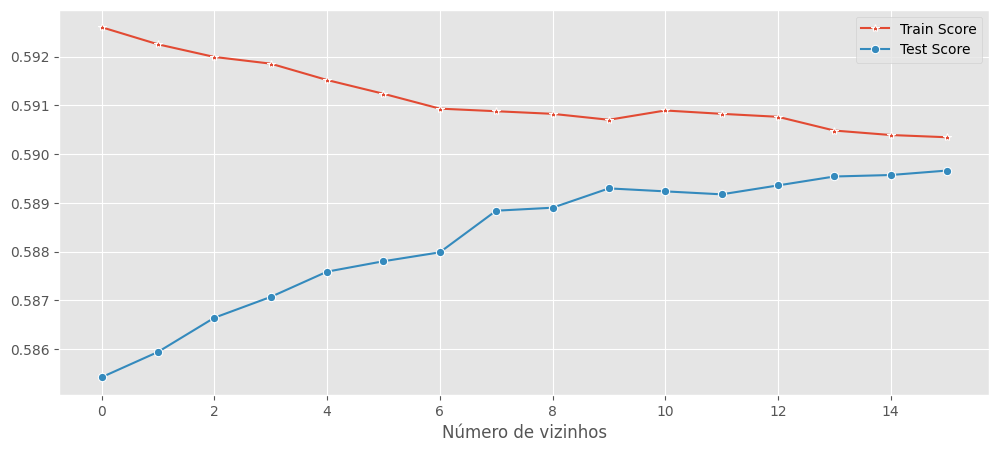

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(data = train_scores,marker='*',label='Train Score')
p = sns.lineplot(data = test_scores,marker='o',label='Test Score')
plt.xlabel('Número de vizinhos')

In [ ]:
knn_acc_treino = knn.score(X_tf,gabarito_treino)
knn_acc_teste = knn.score(y_tf,gabarito_teste)
knn_f1_treino = f1_score(gabarito_treino,knn.predict(X_tf), average = 'weighted')
knn_f1_teste = f1_score(gabarito_teste,knn.predict(y_tf), average = 'weighted')
knn_recall= recall_score(gabarito_teste,knn.predict(y_tf), average = 'weighted')

In [ ]:
from sklearn.metrics import recall_score
knn_recall= recall_score(gabarito_teste,knn.predict(y_tf), average = 'weighted')
from sklearn.metrics import precision_score
knn_precision= precision_score(gabarito_teste,knn.predict(y_tf), average = 'weighted')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a name='DTC'></a>
#Aplicando o modelo Decision Tree Classifier

<a name='grid2'></a>
##Grid Search

Inicialmente, fazendo o grid para testar exaustivamente parâmetros diversos

In [ ]:
param_grid = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth': range(2,10)}

# defining parameter range
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_tf, gabarito_treino)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
print(grid_search.best_params_)
grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 2}


0.5896827997430079

<a name='manu2'></a>
##Testes 'manuais' e visualização

In [ ]:
test_scores = []
train_scores = []

for i in range(2,15):
  clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=0)

# fit the model
  clf_gini.fit(X_tf, gabarito_treino)
  train_scores.append(clf_gini.score(X_tf,gabarito_treino))
  test_scores.append(clf_gini.score(y_tf,gabarito_teste))


Vamos visualizar os resultados

Text(0.5, 0, 'max depth')

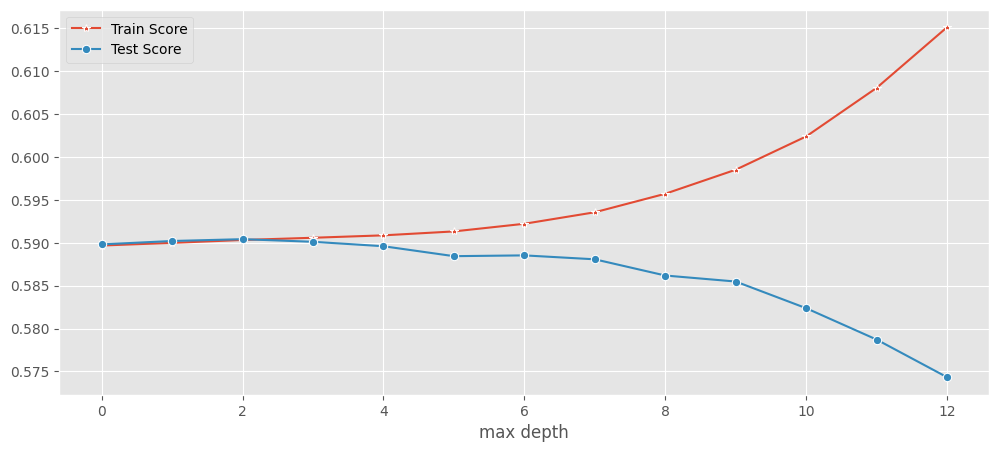

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(data = train_scores,marker='*',label='Train Score')
p = sns.lineplot(data = test_scores,marker='o',label='Test Score')
plt.xlabel('max depth')

In [ ]:
dt_acc_treino = clf_gini.score(X_tf,gabarito_treino)
dt_acc_teste = clf_gini.score(y_tf,gabarito_teste)

dt_f1_treino = f1_score(gabarito_treino,clf_gini.predict(X_tf), average = 'weighted')
dt_f1_teste = f1_score(gabarito_teste,clf_gini.predict(y_tf), average = 'weighted')

dt_recall= recall_score(gabarito_teste,clf_gini.predict(y_tf), average = 'weighted')
dt_precision= precision_score(gabarito_teste,clf_gini.predict(y_tf), average = 'weighted')

<a name='priori'></a>
# 4 - Classificador a priori
Para implementar esse primeiro modelo, devemos considerar apenas o classificador (ISBN) e o Rating do livro em questão. A utilização do classificador no lugar do nome do livro se justifica pela possibilidade de livros com o mesmo nome terem autores diferentes.

In [ ]:
# construindo modelo
train_parameters_priori = train_data_priori.groupby('oe__isbn')['rating'].agg(pd.Series.mode).to_frame()

# juntando resultados do modelo às respostas
train_data_priori = train_data_priori.merge(train_parameters_priori, on = 'oe__isbn', how = 'left')
test_data_priori = test_data_priori.merge(train_parameters_priori, on = 'oe__isbn', how = 'left')

# avaliando se as respostas do modelo correspondem às respostas verdadeiras
train_data_priori['individual_score'] = train_data_priori.drop(['oe__isbn', 'rating_x'], 1).isin(train_data_priori['rating_x']).any(1)
test_data_priori['individual_score'] = test_data_priori.drop(['oe__isbn', 'rating_x'], 1).isin(test_data_priori['rating_x']).any(1)

# scores do modelo
train_score_priori = train_data_priori['individual_score'].mean()
test_score_priori = test_data_priori['individual_score'].mean()

priori_f1_treino = f1_score(gabarito_treino,train_data_priori['rating_y'], average = 'weighted')
priori_f1_teste = f1_score(gabarito_teste,test_data_priori['rating_y'], average = 'weighted')
priori_recall = recall_score(gabarito_teste,test_data_priori['rating_y'], average = 'weighted')
priori_precision = precision_score(gabarito_teste,test_data_priori['rating_y'], average = 'weighted')

<ipython-input-201-e17d620db524>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_data_priori['individual_score'] = train_data_priori.drop(['oe__isbn', 'rating_x'], 1).isin(train_data_priori['rating_x']).any(1)
<ipython-input-201-e17d620db524>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  train_data_priori['individual_score'] = train_data_priori.drop(['oe__isbn', 'rating_x'], 1).isin(train_data_priori['rating_x']).any(1)
<ipython-input-201-e17d620db524>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_data_priori['individual_score'] = test_data_priori.drop(['oe__isbn', 'rating_x'], 1).isin(test_data_priori['rating_x']).any(1)
<ipython-input-201-e17d620db524>:10: FutureWarning: In a future version of pandas all arguments of DataFra

<a name='compar'></a>
# 5 - Comparando resultados

Primeiro, vamos construir uma tabela comparativa e incluir a métrica F1, visto que ela é mais indicada para um problema desbalanceado como esse. Note que foi utilizado o parâmetro "weighted" para pesar nos desbalanceamentos

In [ ]:
comparativa = pd.DataFrame(columns = ['KNN','Decision Tree','A priori'], index = ['Accuracy train','Accuracy test','F1-score train','F1-Score test'])
comparativa['KNN'] = [knn_acc_treino,knn_acc_teste,knn_f1_treino,knn_f1_teste]
comparativa['Decision Tree'] = [dt_acc_treino,dt_acc_teste,dt_f1_treino,dt_f1_teste]
comparativa['A priori'] = [train_score_priori,test_score_priori,priori_f1_treino,priori_f1_teste]
comparativa

,KNN,Decision Tree,A priori
Accuracy train,0.590346,0.615144,0.590201
Accuracy test,0.589663,0.574325,0.590547
F1-score train,0.440833,0.499254,0.441152
F1-Score test,0.439947,0.449141,0.441588


Podemos colocar graficamente também

Text(0.5, 1.0, 'Dispersão das métricas')

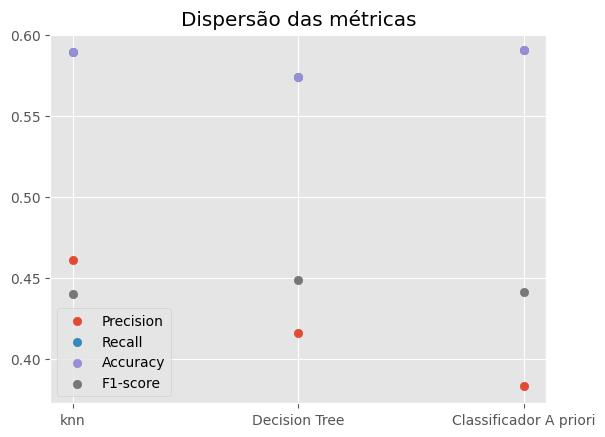

In [ ]:
plt.scatter(["knn", "Decision Tree", "Classificador A priori"], [knn_precision, dt_precision, priori_precision], label="Precision")
plt.scatter(["knn", "Decision Tree", "Classificador A priori"], [knn_recall, dt_recall, priori_recall], label="Recall")
plt.scatter(["knn", "Decision Tree", "Classificador A priori"], [knn_acc_teste, dt_acc_teste, test_score_priori], label="Accuracy")
plt.scatter(["knn", "Decision Tree", "Classificador A priori"], [knn_f1_teste, dt_f1_teste, priori_f1_teste], label="F1-score")
plt.legend()
plt.title("Dispersão das métricas")